In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [12]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv('data/mouse_drug_data.csv')
clinical_trial_data_to_load = pd.read_csv('data/clinicaltrial_data.csv')

In [13]:
# Combine the data into a single dataset
mouse_drug_data_to_load = mouse_drug_data_to_load.drop(mouse_drug_data_to_load.loc[mouse_drug_data_to_load['Mouse ID']=='g989'].index)
clinical_trial_data_to_load = clinical_trial_data_to_load.drop(clinical_trial_data_to_load.loc[clinical_trial_data_to_load['Mouse ID']=='g989'].index)

data = pd.merge(mouse_drug_data_to_load, clinical_trial_data_to_load, on='Mouse ID', how='inner')
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [14]:
# Display the data table for preview
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [15]:
#Tumor Response to Treatment 
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group = data.groupby(['Drug', 'Timepoint'])
tumor = pd.DataFrame()
tumor['Tumor Volume (mm3)'] = group['Tumor Volume (mm3)'].mean()
tumor['Standard Error'] = group['Tumor Volume (mm3)'].sem()
tumor.head()
# Convert to DataFrame


# Preview DataFrame


Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684
          15                  42.064317        0.838617
          20                  40.716325        0.909731

In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_mean = tumor['Tumor Volume (mm3)'].unstack(level=0)
tumor_standard_error = tumor['Standard Error'].unstack(level=0)
tumor_mean.head()

# Convert to DataFrame

# Preview DataFrame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [17]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked


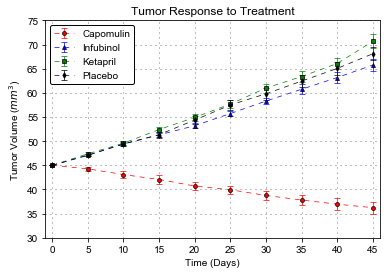

In [26]:
# Generate the Plot (with Error Bars)
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x = tumor_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, tumor_mean[drug], yerr=tumor_standard_error[drug], linestyle='--', linewidth=0.7, dashes=(7, 7), 
    color=colors[i], capsize=3, marker=markers[i], label=labels[i], markersize=4, markerfacecolor=colors[i], 
    markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((30, 75))
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume ($mm^3$)')
plt.title('Tumor Response to Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')


# Save the Figure
plt.savefig("..Tumor_Response_to_Treatment.png")


In [24]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group = data.groupby(['Drug', 'Timepoint'])
metastatic = pd.DataFrame()
metastatic['Metastatic Sites'] = group['Metastatic Sites'].mean()
metastatic['Standard Error'] = group['Metastatic Sites'].sem()
metastatic.head()

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites  Standard Error
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621

In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_mean = metastatic['Metastatic Sites'].unstack(level=0)
metastatic_standarderror = metastatic['Standard Error'].unstack(level=0)
metastatic_mean.head()
# Convert to DataFrame

# Preview DataFrame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


<function matplotlib.pyplot.show(*args, **kw)>

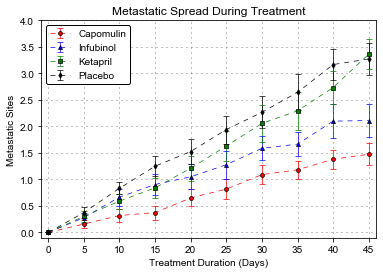

In [34]:
# Generate the Plot (with Error Bars)
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
label = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = metastatic_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, metastatic_mean[drug], yerr=metastatic_standarderror[drug], linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], capsize=3, label=labels[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)
    
plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((-0.1, 4))
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

# Save the Figure
plt.savefig("..Metastatic_Response_to_Treatment.png")

# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [39]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group = data.groupby(['Drug', 'Timepoint'])
survival = pd.DataFrame()
survival['Mouse Count'] = group['Mouse ID'].count()
survival.head()

# Convert to DataFrame

# Preview DataFrame


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [40]:
survival_count = survival['Mouse Count'].unstack(level=0)
survival_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


In [41]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


<function matplotlib.pyplot.show(*args, **kw)>

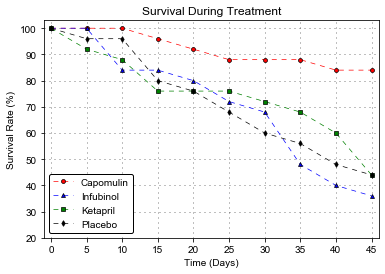

In [44]:
# Generate the Plot (Accounting for percentages)
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = survival_count.index
for i in range(len(drugs)):
    drug = drugs[i]
    survival_rate = survival_count[drug] / survival_count.loc[0, drug] * 100
    plt.errorbar(x, survival_rate, linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], label=labels[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((20, 103))
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

# Save the Figure
plt.savefig("..Survival_Rates.png")

# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
group = data.groupby(['Drug', 'Timepoint'])
tumor_change = pd.DataFrame()
tumor_change['Tumor Volume'] = group['Tumor Volume (mm3)'].mean()
tumor_change = tumor_change.unstack(level=-1)
tumor_change.columns = tumor_change.columns.droplevel(level=0) 
tumor_change['% Tumor Volume Change'] = (tumor_change[45] - tumor_change[0]) / tumor_change[0] * 100
tumor_change = tumor_change[['% Tumor Volume Change']]
tumor_change.head()

# Display the data to confirm


Timepoint,% Tumor Volume Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


<function matplotlib.pyplot.show(*args, **kw)>

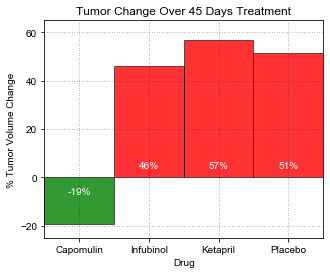

In [51]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['r' if (tumor_change.loc[drug]>0).values[0] else 'g' for drug in drugs]
ax = tumor_change.loc[drugs].plot(kind='bar', color=[tuple(colors)], rot=0, legend=False, alpha=0.8,
                            edgecolor = 'k', linewidth=0.7, width=1, figsize=(5,4))

plt.xlim((-0.5, 3.5))
plt.ylim((-25, 65))
plt.yticks(range(-20,70,20))
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Days Treatment')
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='k')

# Add text labels
posx = range(len(drugs))
posy = [3 if (tumor_change.loc[drug]>0).values[0] else -4 for drug in drugs]
va = ['bottom' if (tumor_change.loc[drug]>0).values[0] else 'top' for drug in drugs]
labels = tumor_change.loc[drugs].values
for i in range(len(drugs)):
    ax.text(posx[i], posy[i], '%1.0d%%' % int(labels[i]), ha='center',va=va[i], color='w')

# Save the Figure
plt.savefig("..Tumor_Change.png")

# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/change.png)